<a href="https://colab.research.google.com/github/thdeandrade/portfolio/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de Fraude em Cartões de Crédito**

<center><img alt="Melhores destinos -Málaga" width="80%", height=400, src="https://bit.ly/3Lxn8SR"></center>
<center><a href='https://unsplash.com/photos/7F65HDP0-E0'>Kenny Eliason do Unplash </a></center>

Houve uma época em que era comum ouvir de amigos e familiares que o melhor banco era aquele em que tínhamos dinheiro depositado. Doce ilusão. Com os bancos (digitais e físicos) cada vez mais inovadores e competitivos, questões como segurança devem sempre vir a frente de tudo. A cada novo inovação do banco, uma nova fraude surge.

De acordo com dados da[ Serasa Experian](https://www.serasaexperian.com.br/sala-de-imprensa/analise-de-dados/ano-de-2021-bate-recorde-com-mais-de-4-milhoes-de-tentativas-de-fraude-revela-serasa-experian/), só no ano de 2021 foram mais de 4 milhões de movimentações suspeitas, sendo aproximadamente 2.3 milhões somente no segmento de bancos e cartões. Quando falamos em valores, estima-se que em 2022 os prejuízos com fraudes bancárias devem chegar ao [patamar mais alto da série histórica](https://exame.com/invest/minhas-financas/golpes-bancarios-disparam-e-devem-gerar-prejuizos-de-r-25-bilhoes-neste-ano/), na ordem de 2.5 bilhões de reais.

Como forma de conter a ação de criminosos, os bancos investem continuamente na prevenção de fraudes financeiras, e um agente que vem ganhando destaque é o cientista de dados. Todo e qualquer tipo de informação obtida diariamente pelo usuário pode e deve ser manipulada e/ou transformada internamente a fim de extrair informações valiosas, tais como possíveis comportamentos suspeitos. 


Nesse artigo, você vai:

*	Manipular uma base de dados reais de cartão de crédito que é disponibilizada no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).
*	Entender as principais características de ações legítimas e fraudulentas.
*	Transformar os dados para uma mesma escala de análise, utilizando a função StandardScaler()
*	Criar dois cenários, com RandomUnderSampler() e RandomOverSampler().
*	Criar três modelos de Machine Learning (Random Forest, Logistic Regression e Naive Bayes) e avaliar seu desempenho a partir das métricas ROC, AUC e matriz de confusão.



## **Importando o necessário**


Vamos começar importando os pacotes utilizados nesse artigo.



In [1]:
#suprimi os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler

#imprime todas as linhas quando solicitado
pd.set_option('display.max_rows', None)

Para simplificar o processo, fiz o download do dataset do Kaggle e subi para o meu [Dropbox](https://www.dropbox.com/s/9vs2z5bcc97gv44/credit_card_fraud.csv?dl=1) Sinta-se a vontade para usá-los! Já vou aproveitar e excluir as linhas repetidas. 

In [2]:
#caminho de busca do dataframe
file_path = "https://www.dropbox.com/s/9vs2z5bcc97gv44/credit_card_fraud.csv?dl=1"

#importa os dados para um dataframe
df = pd.read_csv(file_path)

#visualiza a dimensão do conjunto original
print(f'Tamanho do dataset original: {df.shape}')

#remove linhas duplicadas
oldLen = len(df)
df.drop_duplicates(inplace=True)
print(f'Número de linhas removidas: {oldLen-df.shape[0]}')

#dimensão do conjunto atual
print(f'Tamanho do dataset limpo: {df.shape}')

Tamanho do dataset original: (284807, 31)
Número de linhas removidas: 1081
Tamanho do dataset limpo: (283726, 31)


Com os dados prontos, vamos visualizar as cinco primeiras linhas.

In [3]:
#imprime as cinco primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


É impossível visualizar as primeiras variáveis do dataset e não ficar no mínimo curioso sobre o que elas significam. Como estou lidando com dados bancários que são reais e confidenciais, o verdadeiro significado das variáveis **V1** a **V28** passaram por redução de dimensionalidade. Foi utilizado uma técnica chamada **Análise de Componentes Principais** (ou *Principal Component Analysis*, PCA), que utiliza a variância dos dados para criar uma nova representação de menor dimensão. Para a nossa sorte, essa técnica também melhora a interpretação dos dados e diminui a perda da informação em modelos de M*achine Learning*.

Além dessas variáveis, existem outras três que também merecem atenção. São elas:

*	**Time**: Tempo decorrente entre cada transação em relação a primeira.
*	**Amount**: Valor da transação bancária.
*	**Class**: Variável alvo, onde 0 corresponde a transações não-fraudulentas e 1 corresponde a transações fraudulentas. 

Agora que já sabemos o que significa cada uma, vamos dar uma olhada na estatística descritiva.


In [4]:
#@title
#imprime a estatística descritiva
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Podemos observar que existe uma diferença considerável entre os valores mínimos e máximos de cada variável. Essa característica costuma ser encontrada em variáveis que apresentam valores ***outliers***. Também um existe um desbalanceamento dos dados que deve ser avaliado devido a diferença encontrada entre os valores da média e mediana. Vamos avaliar essa questão mais adiante. 

Agora, vamos verificar se existem valores nulos no nosso dataset.

In [5]:
#@title
#verifica a porcentagem de valores nulos
(df.isnull().sum()/df.shape[0])*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Veja que o dataset não apresentou nenhum valor nulo. E como será que está a distribuição entre as variáveis alvo?

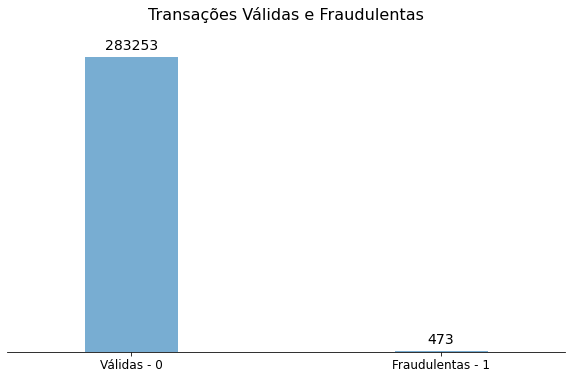

In [6]:
#@title
classes = df.Class.value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Transações Válidas e Fraudulentas', fontsize='16')
classes.plot(kind='bar', alpha=.6, width=.3)

ax.set_xticklabels(['Válidas - 0', 'Fraudulentas - 1'], rotation=360, fontsize=12)
ax.set_yticklabels('')
ax.get_yaxis().set_ticks([])

ax.set_ylim(0, df.shape[0]+30000)


for i, v in enumerate(classes):
  ax.text(i, v+8000, str(int(v)), horizontalalignment='center', fontsize=14)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

Por mais estranho que pareça, esse resultado é mais comum do que se imagina. Vamos pensar que um banco faça milhares (ou milhões) de transações bancárias diariamente, com depósitos, transferências e saques por parte dos clientes, sendo elas totalmente legítimas.

Com novos golpes surgindo, os bancos precisam agir rápido para cada movimentação suspeita. Só quem teve cartão bloqueado sabe o inconveniente que é, mas isso diz muito sobre como o banco age quando ocorre movimentações duvidosas. É chamado de **falso positivo** quando uma movimentação financeira é legítima e mesmo assim foi detectada como fraude. Prever ações fraudulentas são verdadeiros desafios quando levamos em consideração os dados que existem para serem analisados. O que importa para os bancos, em casos de fraude, é a detecção do **verdadeiro positivo**, onde é possível confirmar que aquela atividade é real. Vamos ver mais sobre isso na **matriz de confusão**.


In [7]:
#@title
print(f'O dataset contém {df[df.Class == 1].Class.count()/df.shape[0]*100:.2f}% de transações fraudulentas \
e {df[df.Class == 0].Class.count()/df.shape[0]*100:.2f}% de transações válidas.')

O dataset contém 0.17% de transações fraudulentas e 99.83% de transações válidas.


Veja que o dataset possui somente 0.17% de transações fraudulentas para serem detectadas. Com toda essa diferença, é interessante ir mais fundo e analisar as classes de maneira individual. Será que elas apresentam comportamentos semelhantes? Vamos avaliar o histograma da variável *Time*.

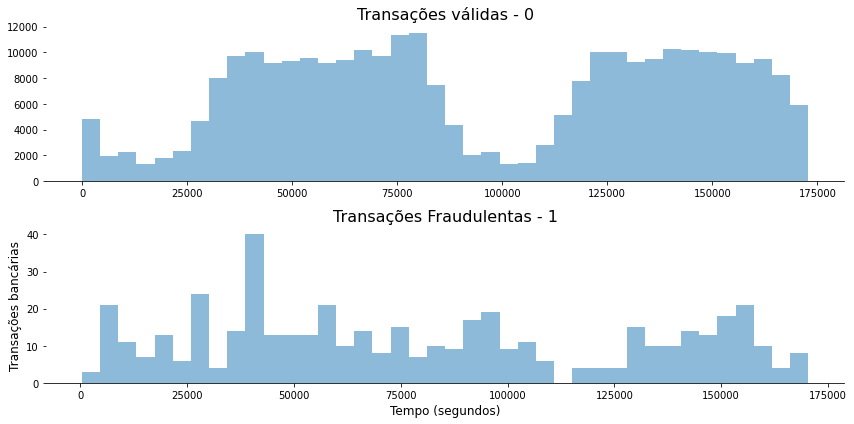

In [8]:
#@title
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 6))

ax[0].set_title('Transações válidas - 0', fontsize=16)
ax[0].hist(df.Time[df.Class == 0], bins=40, alpha=.5)

ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)

ax[1].set_title('Transações Fraudulentas - 1', fontsize=16)
ax[1].hist(df.Time[df.Class == 1], bins=40, alpha=.5)

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)

ax[1].set_xlabel('Tempo (segundos)', fontsize=12)
ax[1].set_ylabel('Transações bancárias', fontsize=12)

plt.tight_layout()

Com o histograma fica claro (e óbvio) que existe um número baixo de transações fraudulentas e sem um comportamento muito bem definido. Vamos dar uma olhada na variável *Amount*.

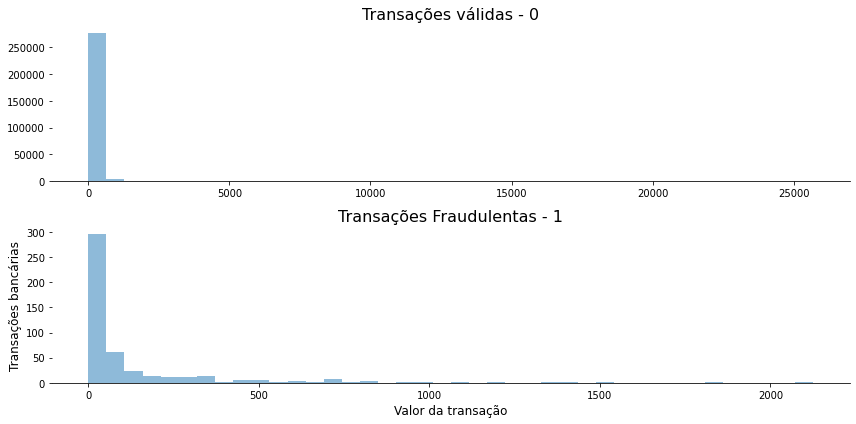

In [9]:
#@title
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 6))

ax[0].set_title('Transações válidas - 0', fontsize=16)
ax[0].hist(df.Amount[df.Class == 0], bins=40, alpha=.5)

ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)

ax[1].set_title('Transações Fraudulentas - 1', fontsize=16)
ax[1].hist(df.Amount[df.Class == 1], bins=40, alpha=.5)

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)

ax[1].set_xlabel('Valor da transação', fontsize=12)
ax[1].set_ylabel('Transações bancárias', fontsize=12)

plt.tight_layout()

Apesar da grandeza entre as classes ser bastante diferente, ao visualizar o histograma da variável *Amount*, podemos ver algo que chama a atenção. Nas transações válidas, existem um pico logo no início e que desaparece conforme vai aumentando o valor da transação. Para as transações fraudulentas, também existe esse pico, mas que segue em menor quantidade ao longo do eixo X. Esse característica pode ser indício de outros ataques em menor escala. Vamos avaliar agora o gráfico boxplot.

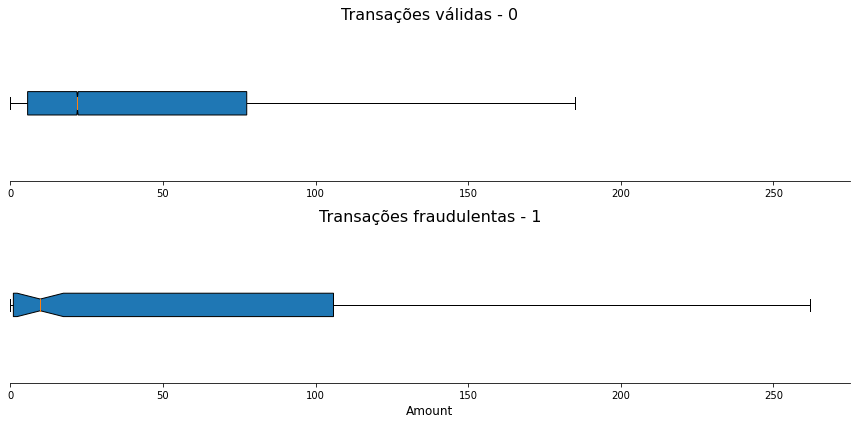

In [10]:
#@title
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,6))

ax[0].set_title('Transações válidas - 0', fontsize=16)
ax[0].boxplot(df.Amount[df.Class == 0], vert=False, patch_artist=True, notch=True, showfliers=False)

ax[0].set_yticks([])
ax[0].set_xlim(0,275)

ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)

ax[0].set_yticklabels([''])

ax[1].set_title('Transações fraudulentas - 1', fontsize=16)
ax[1].boxplot(df.Amount[df.Class == 1], vert=False, patch_artist=True, notch=True, showfliers=False)

ax[1].set_yticks([])
ax[1].set_xlim(0,275)

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)

ax[1].set_xlabel('Amount', fontsize=12)
plt.tight_layout()

Ao visualizar apenas o valor máximo de cada classe podemos ver que existe uma diferença considerável entre os valores das transações fraudulentas e válidas. Vale ressalvar que os valores outliers (muitos, por sinal) foram desconsiderados no gráfico boxplot. 

Acredito que também faça sentido refazer a estatística descritiva com o dataset separado por classe. Observe o valor médio das transações e tire suas próprias conclusões.

In [11]:
#@title
print('Estatística descritiva para a classe 0\n')
print(df[df.Class == 0].Amount.describe())
print('~~'*20)
print('Estatística descritiva para a classe 1\n')
print(df[df.Class == 1].Amount.describe())

Estatística descritiva para a classe 0

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Estatística descritiva para a classe 1

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


## **Preparação dos Dados**



Até aqui, conhecemos melhor o dataset e vimos alguns dos problemas que podem ser desafios durante a análise. Como vou fazer algumas modificações no dataset, melhor criar uma cópia do arquivo original.

In [12]:
#cria uma cópia do dataset
df_clean = df.copy()

Uma coisa que sempre devemos avaliar em qualquer dataset é se os dados pertencem a uma mesma escala. Como vimos anteriormente, as variáveis de *V1* a *V28* são confidenciais e, por isso, foram transformadas em PCA, com uma mesma escala de medida entre elas, enquanto as classes *Time* e *Amount* permaneceram originais. Podemos usar como exemplo a classe *Time*, que é medida por segundos, enquanto a variável *Amount*, simboliza a quantidade de dinheiro, seja ele qual for.

Para evitar qualquer inconveniente futuro, vou deixá-los em uma mesma escala utilizando o pacote [**StandardScaler()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Essa técnica irá redimensionar nossa feature a partir da subtração da média dividido pelo desvio padrão.  Como resultado, os dados passam a ter uma média zero e desvio padrão 1. 

Vamos fazer a transformação e visualizar os resultados.


In [13]:
#padroniza as colunas Time e Amount
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

#visualiza as cinco primeiras linhas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


Feito isso, também vou separar o dataset em treino e teste. Vou deixar habilitado o parâmetro **stratify** para que a nossa variável alvo seja distribuída proporcionalmente. 

In [14]:
#separar as variáveis x e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

#dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=0) 

Em um cenário perfeito, já seria possível seguir com a construção dos modelos de *machine learning*, contudo, ao lidar com dados desbalanceados, devemos tomar cuidado. Do jeito que está, a tendência é que o modelo aprenda muito sobre a **classe majoritária (0)** e, por isso, não encontra a nossa **classe minoritária (1)** tão facilmente. Vale ressaltar que a classe minoritária corresponde a menos de 1% do nosso dataset, como foi analisado anteriormente. 

Para tentar contornar essa situação, vamos utilizar duas técnicas diferentes, e avaliar as métricas em diferentes cenários. Inicialmente, com a técnica [**RandomUnderSampler()**](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html), conseguimos reduzir a classe majoritária de maneira aleatória ao ponto de se igualar a classe majoritária. Observe que a transformação diminuiu drasticamente a classe de transações válidas.

In [15]:
#undersampling 
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

#balanceamento das classes
print(pd.Series(y_rus).value_counts())

0    355
1    355
Name: Class, dtype: int64


Também vamos também utilizar a técnica [**RandomOverSampler()**](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html), onde as classes minoritárias serão replicadas aleatoriamente, deixando assim o dataset equilibrado. Como já vimos, as transações fraudulentas não são tão representativas como gostaríamos (e ainda bem!), então vamos replicar apenas 10% dos nossos dados.

In [16]:
#oversampling
ros = RandomOverSampler(sampling_strategy=0.1)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

#balanceamento de classes
print(pd.Series(y_ros).value_counts())

0    212439
1     21243
Name: Class, dtype: int64


É nítido que a distribuição entre as classes parece melhor em ambos os casos, contudo, como diz o ditado popular: *'não existe almoço de graça'*. 

Quando utilizamos a técnica de **subamostragem** (ou *undersampling*), pode acontecer de apagar informações importantes da classe majoritária para o treinamento do nosso modelo, uma vez que não temos o controle se as informações excluídas serão boas ou ruins. Em contrapartida, durante a **superamostragem** (ou *oversampling)*, ao replicarmos os valores das classes minoritárias, podemos ocasionar **superajuste** (ou *overfitting*) nos dados de treino, impactando na avaliação de desempenho com os dados de teste. 

Tendo em vista os prós e contras de cada técnica, vamos visualizar como era correlação entre as variáveis e como que está agora com as transformações aplicadas.


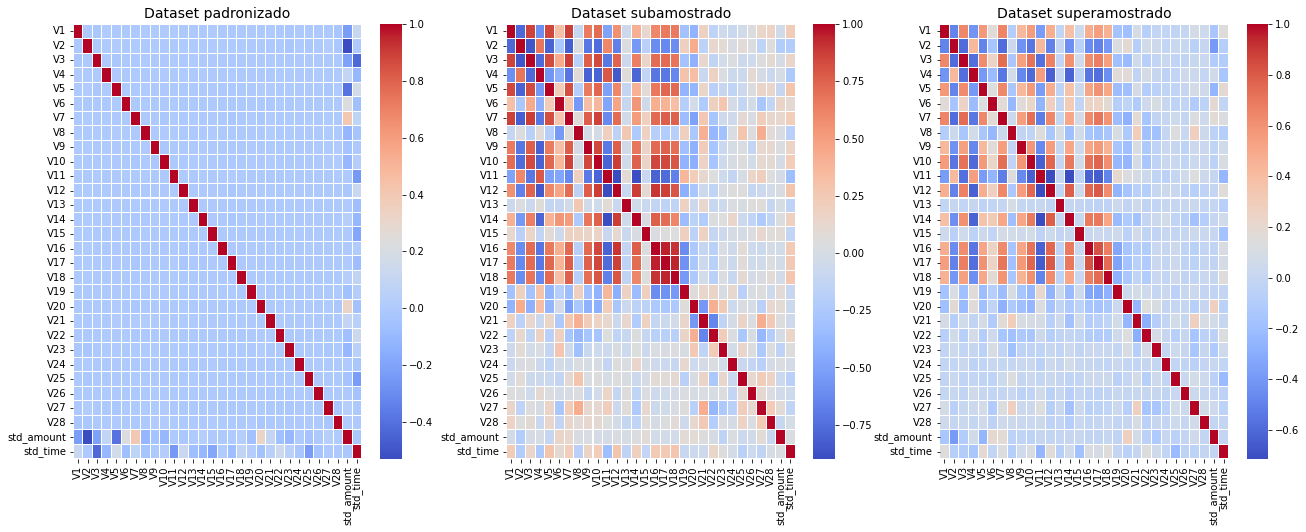

In [17]:
#@title
#matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()
corr_ros = pd.DataFrame(X_ros).corr()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (22,8))

sns.heatmap(corr, xticklabels=corr.columns, linewidths=.01, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Dataset padronizado', fontsize=14)

sns.heatmap(corr_rus, xticklabels=corr.columns, linewidths=.01, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Dataset subamostrado', fontsize=14)

sns.heatmap(corr_ros, xticklabels=corr.columns, linewidth=.01, cmap='coolwarm', ax=ax[2])
ax[2].set_title('Dataset superamostrado', fontsize=14)

plt.show()

E nítido como a transformação melhorou a correlação entre as variáveis. Já conseguimos ver que a correlação do undersampling parece fazer mais sentido, uma vez que o equilíbrio entre as classes é maior, além de serem informações mais próximas da realidade.

## **Machine Learning e desempenho**

Com os dados já tratados, posso começar a fazer alguns experimentos com alguns modelos de machine learning. Sim, no plural, uma vez que, com a comparação do resultado de mais de um algoritmo, consigo validar qual modelo conseguiu generalizar melhor conjuntos de dados. Sendo assim, os modelos escolhidos para a análise são a Regressão Logística, Naive Bayes e Random Forest. De maneira simples, vamos falar um pouco a respeito de cada um deles.

A Regressão Logística é um modelo de classificação supervisionada que é utilizada em situações que nosso alvo são classes binária (0 e 1). Nesse sentido, o algoritmo é capaz de determinar a probabilidade de ocorrência de uma classe associada ao conjunto de variáveis utilizadas a partir de pesos ou valores dos coeficientes. 

O algoritmo Random Forest também é modelo supervisionado, contudo, tem a capacidade de resolver problemas tanto de classificação como de regressão a partir da criação de diversas árvores de decisão. A partir de amostras, o modelo cria n árvores diferentes e independentes entre si, onde cada uma delas terá o seu output. No caso da regressão, o resultado final é a média dos valores de cada árvore. Por ser um modelo de maior complexidade, o Random Forest será o único algorítmo em que vamos indicar alguns parâmetros.

Também vamos utilizar o algoritmo Naive Bayes por ser de aplicação simples e performance rápida. O algoritmo também é um modelo supervisionado e que utiliza o Teorema de Bayes para realizar as predições, onde se assume que as variáveis são independentes e não têm correlação entre elas. 

Para o último modelo, também quero verificar se um algoritmo mais simples consegue ter um melhor desempenho quando comparado a outros mais complexos. Feito isso, vamos instanciar nossos modelos e iniciar as análises.


In [18]:
#cria uma semente aleatória
np.random.seed(1)

#regressão logística
lr = LogisticRegression()

#naive bayes
nb = GaussianNB()

#random forest
rf = RandomForestClassifier(max_depth=7,
                             n_estimators=100, 
                             oob_score=True)

### **Undersampling dataset**

Com os modelos prontos, vou iniciar o treinamento com do dataset reduzido por undersampling e separar as devidas probabilidades para avaliação.

In [19]:
#ajusta o modelo com os dados de treino 
lr.fit(X_rus, y_rus)
nb.fit(X_rus, y_rus)
rf.fit(X_rus, y_rus)

#faz as previsões em cima dos dados de treino
lr_proba = lr.predict_proba(X_test)
nb_proba = nb.predict_proba(X_test)
rf_proba = rf.predict_proba(X_test)

#mantém apenas a classe 0
lr_proba = lr_proba[:,1]
nb_proba = nb_proba[:,1]
rf_proba = rf_proba[:,1]

Com os modelos devidamente treinado, vamos falar sobre a métrica utilizada. A curva ***ROC*** (em inglês, *Receiver Operating Characteristics*) costuma ser usada para avaliar o desempenho de modelos utilizados para classificar alvos do tipo binário, assim como o nosso dataset. Ao analisar o gráfico, observamos a relação do eixo Y, que representa a taxa de verdadeiro positivo (ou sensibilidade), possui com o eixo X, que representa a taxa de falso positivo (ou especificidade).  Para simplificar a interpretação, vamos incluir a ***AUC*** (em inglês, Area Under Curve), que avalia o desempenho do teste a partir da área encontrada sob a curva.

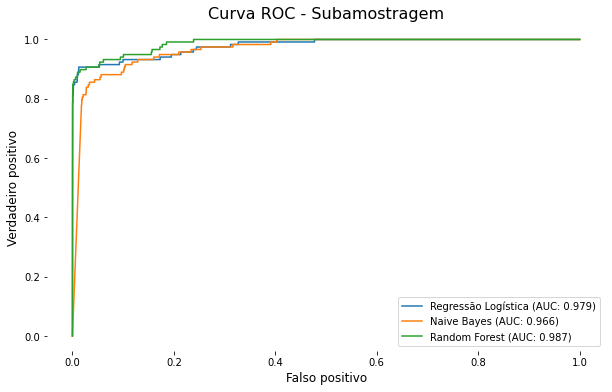

In [20]:
#@title
#calcula a auc
lr_auc = roc_auc_score(y_test, lr_proba)
nb_auc = roc_auc_score(y_test, nb_proba)
rf_auc = roc_auc_score(y_test, rf_proba)

#calcula roc
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(lr_fpr, lr_tpr, label=f'Regressão Logística (AUC: {round(lr_auc, 3)})')
ax.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC: {round(nb_auc, 3)})')
ax.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC: {round(rf_auc, 3)})') 

ax.set_title('Curva ROC - Subamostragem', fontsize=16)
ax.set_xlabel('Falso positivo', fontsize=12)
ax.set_ylabel('Verdadeiro positivo', fontsize=12)
ax.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.show()

A métrica *AUC* mostra que a performance do Random Forest foi ligeiramente melhor que dos outros modelos. Para ilustrar o desempenho dos modelos, vamos plotar a matriz de confusão e visualizar quais foram os valores reais e preditos. Se o resultado parecer um tanto confuso, é só seguir a ilustração apresentada logo abaixo.

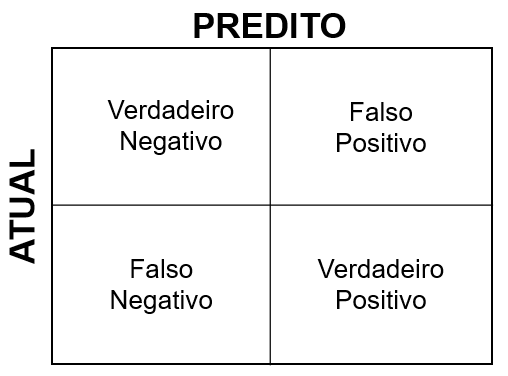

Vamos avaliar a matriz e ver o quão bem os nossos modelos conseguiram identificar ações fraudulentas que, nesse caso, são os **Verdadeiros Positivos**.

In [21]:
#@title
#fazer as previsões em cima dos dados de treino.
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_rf = rf.predict(X_test)

#cria as matrizes de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print('Matriz de confusão para o dataset subamostrado\n')
print(f'Regressão Logística \n{cm_lr}\n')
print(f'Naive Bayes \n{cm_nb}\n')
print(f'Random Forest \n{cm_rf}\n')

Matriz de confusão para o dataset subamostrado

Regressão Logística 
[[68641  2173]
 [   11   107]]

Naive Bayes 
[[68641  2173]
 [   11   107]]

Random Forest 
[[69614  1200]
 [   12   106]]



Os resultados mostrados pela matriz de confusão deixam claro que os modelos Regressão Logística e Naive Bayes apresentaram desempenho parecidos. Já o modelo Random Forest teve um melhor desempenho ao detectar a classe 0 (ou verdadeiro negativo), enquanto teve uma ligeira piora na classe 1 (verdadeiro positivo).
Vale ressaltar que devemos sempre testar nossos modelos com novos parâmetros de entrada antes de falar sobre o melhor ou pior. Para não prolongar esse artigo, vamos considerar o resultado como está, e faremos exatamente os mesmos procedimentos com os dados superamostrados.


### **Oversampling dataset**

Vou treinar o modelo novamente, mas com os dados superamostrados, e avaliar com as mesmas métricas avaliadas anteriormente. 

In [22]:
#ajusta o modelo com os dados de treino 
lr.fit(X_ros, y_ros)
nb.fit(X_ros, y_ros)
rf.fit(X_ros, y_ros)

#faz as previsões em cima dos dados de treino
lr_proba = lr.predict_proba(X_test)
nb_proba = nb.predict_proba(X_test)
rf_proba = rf.predict_proba(X_test)

#mantém apenas a classe 0
lr_proba = lr_proba[:,1]
nb_proba = nb_proba[:,1]
rf_proba = rf_proba[:,1]

Com tudo pronto, vamos ver se o resultado apresentou alguma diferença considerável.

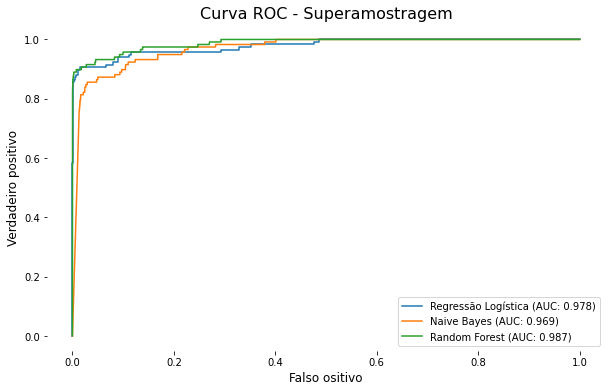

In [23]:
#@title
#calcula a auc
lr_auc = roc_auc_score(y_test, lr_proba)
nb_auc = roc_auc_score(y_test, nb_proba)
rf_auc = roc_auc_score(y_test, rf_proba)

#calcula roc
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(lr_fpr, lr_tpr, label=f'Regressão Logística (AUC: {round(lr_auc, 3)})')
ax.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC: {round(nb_auc, 3)})')
ax.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC: {round(rf_auc, 3)})') 

ax.set_title('Curva ROC - Superamostragem', fontsize=16)
ax.set_xlabel('Falso ositivo', fontsize=12)
ax.set_ylabel('Verdadeiro positivo', fontsize=12)
ax.legend() # 

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.show()

Observe que a Regressão Logística obteve uma ligeira melhora com o dataset superamostrados, enquanto os algoritmos Naive Bayes e Random Forest caíram algumas casas decimais no desempenho. Será que podemos considerar isso ruim? Vamos avaliar o que a matriz de confusão.

In [24]:
#fazer as previsões em cima dos dados de treino.
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_rf = rf.predict(X_test)

#criando as matrizes de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print('Results for Oversampling dataset\n')
print(f'Confusion Matrix for Logistic Regression \n{cm_lr}\n')
print(f'Confusion Matrix for Naive Bayes \n{cm_nb}\n')
print(f'Confusion Matrix for Random Forest \n{cm_rf}\n')

Results for Oversampling dataset

Confusion Matrix for Logistic Regression 
[[70645   169]
 [   17   101]]

Confusion Matrix for Naive Bayes 
[[69007  1807]
 [   19    99]]

Confusion Matrix for Random Forest 
[[70799    15]
 [   21    97]]



O algoritmo Random Forest novamente superou os demais modelos para a detecção da classe 0, mas não é essa a classe que buscamos para análise de fraude. O algoritmo Regressão Logística obteve o melhor desempenho entre os modelos utilizados para a detecção da classe 1 para dados superamostrados. 

Conforme mencionado anteriormente, aqui também é necessário testar novos modelos e parâmetros antes de afirmar qual é o melhor caminho. Mesmo com o bom desempenho da Regressão Logística, devemos avaliar todas as possibilidades para, então, bater o martelo. Diante de todas as transações realizadas diariamente, ainda é uma minoria considerável os casos de fraude bancária, mas ainda existem, e podem causar prejuízo financeiro e de imagem para a instituição bancária.

## **Conclusão**

Até aqui, falamos sobre os desafios e impedimentos existentes quando estamos trabalhando com dados desbalanceados, e, em especial, com fraude de cartão de crédito. 

Logo no início foi removido todos valores duplicados do dataset e também verificado se existia valores nulos. A partir da estatística descritiva e análise exploratória, ficamos atentos a possíveis problemas durante a avaliação, inclusive a quantidade disponível para cada classe (0 e 1). Para padronizar as informações em apenas uma unidade de escala, os dados foram transformados pela função *StandardScaler()* e separados em dois cenários diferentes (de superamostragem e subamostragem). Também foi possível observar no mapa de calor que a correlação entre as variáveis aumentou consideravelmente. 

A partir da avaliação dos modelos de machine learning (Regressão Logística, Random Forest e Naive Bayes), conseguimos averiguar que os três obtiveram um desempenho marginal para a métrica *AUC*. Apesar do modelo Random Forest ter a performance melhor que os demais, o mesmo não obteve os melhores resultados na detecção da detecção da classe 1, conforme visto na matriz de confusão. Vale ressaltar que todos os três foram gerados com sua configuração padrão, o que necessitaria de novos testes uma avaliação mais assertiva.

E se você chegou até neste e quer sugerir algo ou dar algum feedback, fique a vontade para entrar em contato por aqui mesmo ou via [LinkedIn](https://www.linkedin.com/in/thiago-aguas/). Ficarei feliz em discutir novos pontos de vista.

Até mais!
